<a href="https://colab.research.google.com/github/JonathanItha/CrossOver_Trade_Sim/blob/main/CrossOver_Trade_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
sp500 = yf.download('^GSPC' , start='2022-01-01')
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000
...,...,...,...,...,...,...
2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,5283.399902,4046920000
2024-06-04,5278.240234,5298.799805,5257.629883,5291.339844,5291.339844,3707900000
2024-06-05,5314.479980,5354.160156,5297.640137,5354.029785,5354.029785,3591460000


In [ ]:
h10 = sp500.rolling(10).mean()
sp500['AV10'] = h10['Close']

h50 = sp500.rolling(50).mean()
sp500['AV50'] = h50['Close']

In [ ]:
sp500[['Close', 'AV10' , 'AV50']]

,Close,AV10,AV50
Date,,,
2022-01-03,4796.560059,NaN,NaN
2022-01-04,4793.540039,NaN,NaN
2022-01-05,4700.580078,NaN,NaN
2022-01-06,4696.049805,NaN,NaN
2022-01-07,4677.029785,NaN,NaN
...,...,...,...
2024-06-03,5283.399902,5287.848975,5181.839834
2024-06-04,5291.339844,5286.169971,5182.983027
2024-06-05,5354.029785,5289.431934,5185.699824


In [ ]:
sp500.dropna(inplace=True)

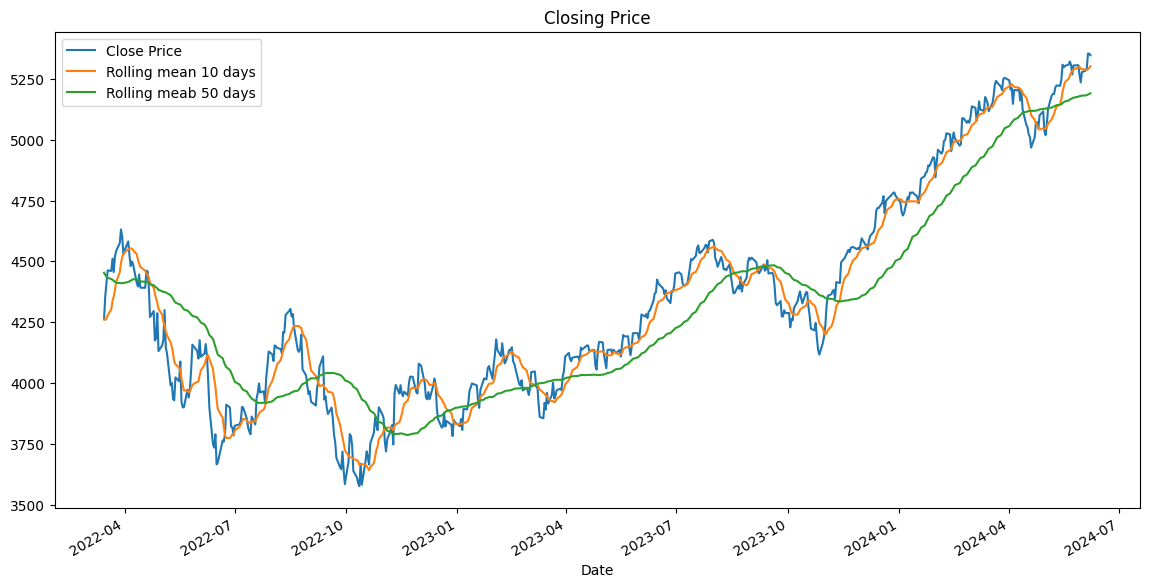

In [ ]:
fig , ax = plt.subplots(figsize=(14, 7))
sp500['Close'].plot(ax=ax , label='Close Price' )
sp500['AV10'].plot(ax=ax , label='Rolling mean 10 days')
sp500['AV50'].plot(ax=ax , label='Rolling meab 50 days')
plt.title('Closing Price')
ax.legend()
plt.show()

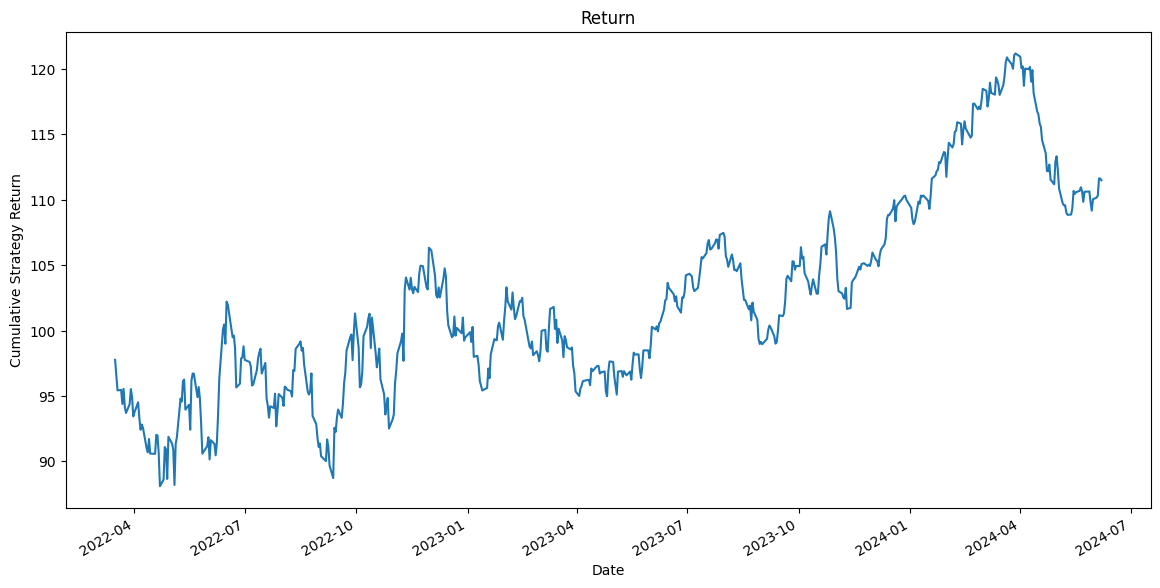

111.48499347130216

In [ ]:
# Define trading signals
# Buy (1) when AV10 > AV50, Sell (-1) when AV10 < AV50
sp500['Signal'] = np.where(sp500['AV10'] > sp500['AV50'], 1, -1)
sp500['Daily Return'] = sp500['Close'].pct_change()
sp500['Strategy Return'] = sp500['Daily Return'] * sp500['Signal'].shift()


initial_investment = 100
sp500['Cumulative Strategy Return'] = (1 + sp500['Strategy Return']).cumprod() * initial_investment

sp500['Cumulative Strategy Return'].plot( figsize=(14, 7), ylabel = 'Cumulative Strategy Return' , title = 'Return')
plt.show()

final_cumulative_return = sp500['Cumulative Strategy Return'].iloc[-1]
final_cumulative_return